In [2]:
import pandas as pd

In [6]:
df_recipes = pd.read_csv('../../data/raw/RAW_recipes.csv')
df_interactions = pd.read_csv('../../data/raw/RAW_interactions.csv')

In [22]:
df_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


<Axes: >

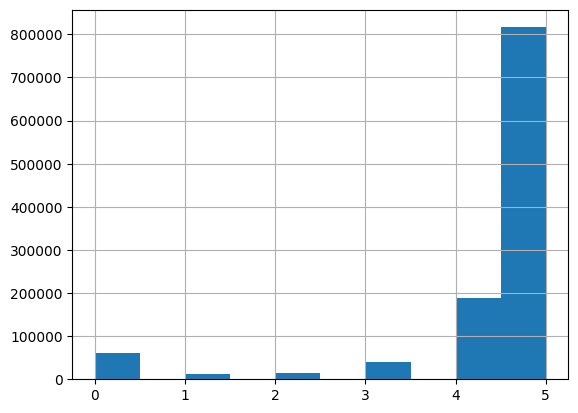

In [17]:
df_interactions['rating'].hist()

In [16]:
df_filtered = df_interactions[df_interactions['rating'] != 0]
recipe_stats = df_filtered.groupby('recipe_id')['rating'].agg(['mean', 'std', 'count']).reset_index()
recipe_stats['std'] = recipe_stats['std'].fillna(0)
top_recipes = recipe_stats.sort_values(by=['mean', 'std', 'count'], ascending=[False, True, False]).head(10)

print(top_recipes)

        recipe_id  mean  std  count
220058     486496   5.0  0.0    192
217036     474520   5.0  0.0     95
225307     515167   5.0  0.0     73
87363      154351   5.0  0.0     69
103499     186029   5.0  0.0     67
221675     495275   5.0  0.0     64
30762       55309   5.0  0.0     52
226023     524863   5.0  0.0     49
221637     495124   5.0  0.0     46
225236     514605   5.0  0.0     46


In [25]:
df_recipes[df_recipes['id'] == 486496]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
12559,bacon lattice tomato muffins rsc,486496,60,2390546,2012-09-06,"['weeknight', '60-minutes-or-less', 'time-to-m...","[664.3, 71.0, 42.0, 68.0, 37.0, 101.0, 14.0]",20,['preheat oven to 400f line a rimmed baking sh...,"""ready, set, cook! contest entry."" bacon latti...","['reynolds wrap foil', 'bacon', 'flakey biscui...",11
